In [1]:
import pandas as pd
import numpy as np


In [2]:
base_rest_df = pd.read_csv('../restaurant_base.csv', sep=';')
base_rest_df.head()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_73740/1172408796.py:1: DtypeWarning: Columns (14,16,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  base_rest_df = pd.read_csv('../restaurant_base.csv', sep=';')


,restaurant_link,country,region,province,city,latitude,longitude,price_level,cuisines,features,...,meals_Lunch,meals_Breakfast,meals_Drinks,meals_Brunch,meals_After-hours,special_diets_Vegetarian Friendly,special_diets_Gluten Free Options,special_diets_Vegan Options,special_diets_Halal,special_diets_Kosher
0,g10001637-d10002227,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.961674,1.169131,€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
1,g10002858-d4586832,France,Centre-Val de Loire,Berry,Rivarennes,46.635895,1.386133,€,"French, European","Reservations, Seating, Table Service, Wheelcha...",...,1,0,1,0,0,0,0,0,0,0
2,g10002986-d3510044,France,Nouvelle-Aquitaine,Correze,Lacelle,45.642610,1.824460,€,French,"Reservations, Seating, Serves Alcohol, Table S...",...,1,0,0,0,0,0,0,0,0,0
3,g10022428-d9767191,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,44.208860,2.960470,€€-€€€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
4,g10055971-d10040330,France,Auvergne-Rhone-Alpes,Ain,Journans,46.144340,5.331200,€€-€€€,French,"Reservations, Seating, Table Service, Serves A...",...,1,0,0,0,0,0,0,0,0,0


In [3]:
base_rest_df.columns

Index(['restaurant_link', 'country', 'region', 'province', 'city', 'latitude',
       'longitude', 'price_level', 'cuisines', 'features', 'avg_rating',
       'total_reviews_count', 'price_min', 'price_max', 'min_open_dttm',
       'min_open_sec', 'max_close_dttm', 'max_close_sec', 'break_flg',
       'max_break_hours', 'max_no_weekend_hours', 'max_weekend_hours',
       'open_mon_hours', 'open_tue_hours', 'open_wed_hours', 'open_thu_hours',
       'open_fri_hours', 'open_sat_hours', 'open_sun_hours', 'meals_Dinner',
       'meals_Lunch', 'meals_Breakfast', 'meals_Drinks', 'meals_Brunch',
       'meals_After-hours', 'special_diets_Vegetarian Friendly',
       'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
       'special_diets_Halal', 'special_diets_Kosher'],
      dtype='object')

In [7]:
drop_columns = [
#     'restaurant_link', 
#     'country', 
    'region', 'province', # 'city', 
    'latitude', 'longitude', 
    
#     'price_level', 'cuisines', 'features', 
#     'avg_rating', 'total_reviews_count', 
    'price_min', 'price_max', 
    
    'min_open_dttm',
       'min_open_sec', 'max_close_dttm', 'max_close_sec', 'break_flg',
       'max_break_hours', 'max_no_weekend_hours', 'max_weekend_hours',
       'open_mon_hours', 'open_tue_hours', 'open_wed_hours', 'open_thu_hours',
       'open_fri_hours', 'open_sat_hours', 'open_sun_hours', 
    
#     'meals_Dinner',
#        'meals_Lunch', 'meals_Breakfast', 'meals_Drinks', 'meals_Brunch',
#        'meals_After-hours', 'special_diets_Vegetarian Friendly',
#        'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
#        'special_diets_Halal', 'special_diets_Kosher'
]

In [8]:
base_rest_df2 = base_rest_df.drop(drop_columns, axis=1)
print(base_rest_df2.shape)

(198446, 19)


In [6]:
# rating of values in the column

def rating_of_column_values(df, column, separator=', '):
    df2 = df[list(df)]
    df2['column_2'] = df2[column].str.split(separator)
    tags_list = list(set().union(*df2['column_2'].dropna()))

    tags_list_2 = []
    for tag in tags_list:
        tags_list_2.append([tag, df2['column_2'].dropna().map(set([tag]).issubset).fillna(False).value_counts()[True]])

    tags_list_2 = sorted(tags_list_2, key=lambda x: x[1], reverse=True)
    df2 = df2.drop(['column_2'], axis=1)
    return tags_list_2

# dummies without not popular options of feature columns

def features_to_flags(df, feature_col_list, threshold):
    for col in feature_col_list:
        top_tags = [f[0] for f in rating_of_column_values(df, col, separator=', ') if f[1] >= threshold * len(df)]
        for t in top_tags:
            df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
        df = df.drop(col, axis=1)
    return df


In [10]:
german_df = base_rest_df2[base_rest_df2['country'] == 'Germany']
german_df.groupby('city').size().sort_values(ascending=False)[:20]

city
Munich                  293
Cologne                 229
Frankfurt               227
Dusseldorf              142
Nuremberg               120
Stuttgart               118
Bremen                   76
Hannover                 76
Dresden                  71
Leipzig                  59
Essen                    59
Bonn                     57
Karlsruhe                55
Wiesbaden                52
Dortmund                 50
Freiburg im Breisgau     44
Mannheim                 44
Heidelberg               43
Aachen                   41
Bielefeld                39
dtype: int64

In [11]:
dresden_df = base_rest_df2[base_rest_df2['city'] == 'Dresden']
dresden_df.shape

(71, 19)

In [15]:
# italy_df = base_rest_df2[base_rest_df2['country'] == 'Italy']
dresden_df2 = features_to_flags(dresden_df, ['cuisines', 'features'], 0.2)
dresden_df2

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_73740/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)


,restaurant_link,country,city,price_level,avg_rating,total_reviews_count,meals_Dinner,meals_Lunch,meals_Breakfast,meals_Drinks,...,cuisines_International,cuisines_Healthy,features_Seating,features_Reservations,features_Table Service,features_Serves Alcohol,features_Takeout,features_Outdoor Seating,features_Wheelchair Accessible,features_Wine and Beer
53720,g187399-d10177077,Germany,Dresden,€€-€€€,4.0,99.0,1,1,0,0,...,0,0,1,1,1,1,1,1,0,1
53721,g187399-d10194128,Germany,Dresden,€,4.5,12.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
53722,g187399-d10312895,Germany,Dresden,€,4.5,40.0,0,1,1,1,...,0,0,1,0,1,1,1,1,1,1
53723,g187399-d1041362,Germany,Dresden,€€-€€€,4.0,363.0,1,1,1,0,...,0,0,1,1,1,1,0,1,0,1
53724,g187399-d1041367,Germany,Dresden,€€-€€€,4.0,457.0,1,1,0,0,...,0,0,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53786,g187399-d953093,Germany,Dresden,€€-€€€,4.5,7.0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
53787,g187399-d9592787,Germany,Dresden,€€-€€€,4.5,11.0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
53788,g187399-d966385,Germany,Dresden,€€-€€€,3.5,12.0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
53789,g187399-d966404,Germany,Dresden,€€-€€€,4.0,66.0,1,1,0,0,...,0,0,1,1,1,1,0,0,0,0


In [24]:
# dresden_df2.select_dtypes(include=[object])
dresden_df2.select_dtypes(include=[int]).columns


Index(['meals_Dinner', 'meals_Lunch', 'meals_Breakfast', 'meals_Drinks',
       'meals_Brunch', 'meals_After-hours',
       'special_diets_Vegetarian Friendly',
       'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
       'special_diets_Halal', 'special_diets_Kosher', 'cuisines_German',
       'cuisines_Cafe', 'cuisines_European', 'cuisines_Central European',
       'cuisines_Mediterranean', 'cuisines_Asian', 'cuisines_Italian',
       'cuisines_Fast food', 'cuisines_International', 'cuisines_Healthy',
       'features_Seating', 'features_Reservations', 'features_Table Service',
       'features_Serves Alcohol', 'features_Takeout',
       'features_Outdoor Seating', 'features_Wheelchair Accessible',
       'features_Wine and Beer'],
      dtype='object')

In [30]:
dresden_df2_flags = dresden_df2.select_dtypes(include=[int]).sum()
dresden_df2_flags[dresden_df2_flags >= 15]

meals_Dinner                      52
meals_Lunch                       42
meals_Breakfast                   21
meals_Drinks                      15
cuisines_German                   31
cuisines_Cafe                     15
cuisines_European                 17
features_Seating                  55
features_Reservations             50
features_Table Service            45
features_Serves Alcohol           25
features_Takeout                  21
features_Outdoor Seating          20
features_Wheelchair Accessible    16
features_Wine and Beer            15
dtype: int64

In [32]:
dresden_df2_flags_columns = list(dresden_df2_flags[dresden_df2_flags >= 15].index)
dresden_df2_flags_columns

['meals_Dinner',
 'meals_Lunch',
 'meals_Breakfast',
 'meals_Drinks',
 'cuisines_German',
 'cuisines_Cafe',
 'cuisines_European',
 'features_Seating',
 'features_Reservations',
 'features_Table Service',
 'features_Serves Alcohol',
 'features_Takeout',
 'features_Outdoor Seating',
 'features_Wheelchair Accessible',
 'features_Wine and Beer']

In [33]:
dresden_df3 = dresden_df2[['restaurant_link'] + dresden_df2_flags_columns]
dresden_df3

,restaurant_link,meals_Dinner,meals_Lunch,meals_Breakfast,meals_Drinks,cuisines_German,cuisines_Cafe,cuisines_European,features_Seating,features_Reservations,features_Table Service,features_Serves Alcohol,features_Takeout,features_Outdoor Seating,features_Wheelchair Accessible,features_Wine and Beer
53720,g187399-d10177077,1,1,0,0,1,0,0,1,1,1,1,1,1,0,1
53721,g187399-d10194128,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
53722,g187399-d10312895,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1
53723,g187399-d1041362,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1
53724,g187399-d1041367,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53786,g187399-d953093,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
53787,g187399-d9592787,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
53788,g187399-d966385,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0
53789,g187399-d966404,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0


In [ ]:
# PIVOT 

In [42]:
dresden_df4 = dresden_df3.set_index('restaurant_link').stack().reset_index().rename(columns={'level_1':'pop_feature', 0: 'flag'})
dresden_df4 = dresden_df4[dresden_df4['flag'] == 1]
dresden_df4.drop(['flag'], axis=1, inplace=True)
dresden_df4


,restaurant_link,pop_feature
0,g187399-d10177077,meals_Dinner
1,g187399-d10177077,meals_Lunch
4,g187399-d10177077,cuisines_German
7,g187399-d10177077,features_Seating
8,g187399-d10177077,features_Reservations
...,...,...
1058,g187399-d982799,features_Reservations
1059,g187399-d982799,features_Table Service
1060,g187399-d982799,features_Serves Alcohol
1061,g187399-d982799,features_Takeout


In [44]:
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt


In [43]:
# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(dresden_df4['restaurant_link'], bipartite='restaurant')
G.add_nodes_from(dresden_df4['pop_feature'], bipartite='feature')

# Add in each edge along with the date the edge was created
for r, d in dresden_df4.iterrows():
    G.add_edge(d['restaurant_link'], d['pop_feature'])


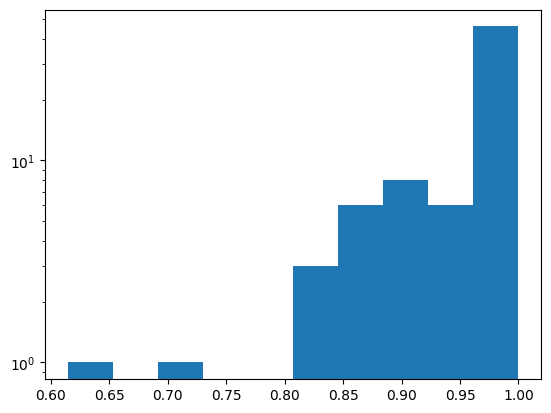

In [45]:

# Get the student partition's nodes: student_nodes
restaurant_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'restaurant']

# Create the students nodes projection as a graph: G_students
G_restaurant = nx.bipartite.projected_graph(G, nodes=restaurant_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_restaurant)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()

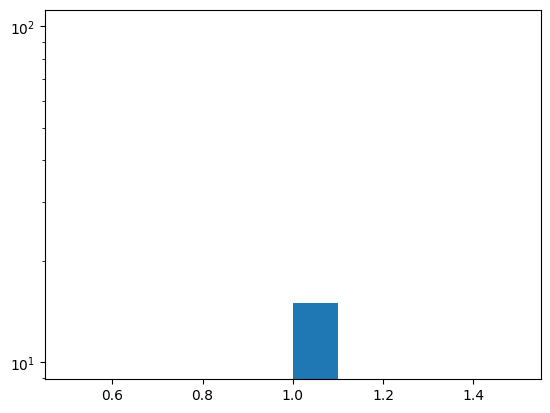

In [46]:
# Get the forums partition's nodes: forum_nodes
feature_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'feature']


# Create the forum nodes projection as a graph: G_forum
G_feature = nx.bipartite.projected_graph(G, nodes=feature_nodes)


# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_feature)


# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')
plt.show() 


/opt/homebrew/lib/python3.11/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

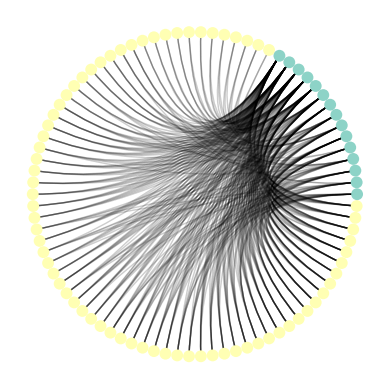

In [49]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=feature_nodes)
for n, d in G.nodes(data=True):
    G.nodes[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = nv.CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_order='dc')
c.draw()
plt.show()


In [ ]:
# https://ericmjl.github.io/nxviz/

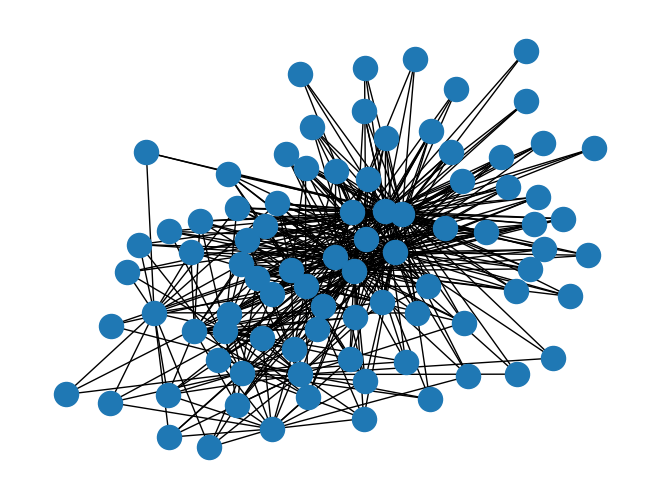

In [53]:
nx.draw(G)
plt.show()

In [126]:
def bipartite_shift(G, k, v):
    G_nodes = {n[0]: n[1]['bipartite'] for n in G.nodes(data=True)}
    if G_nodes[k] == 'restaurant':
        return np.add(v, np.array([-1, 0], dtype='float32'))
    elif G_nodes[k] == 'feature':
        return np.add(v, np.array([0.1, 0], dtype='float32'))
    else:
        return v

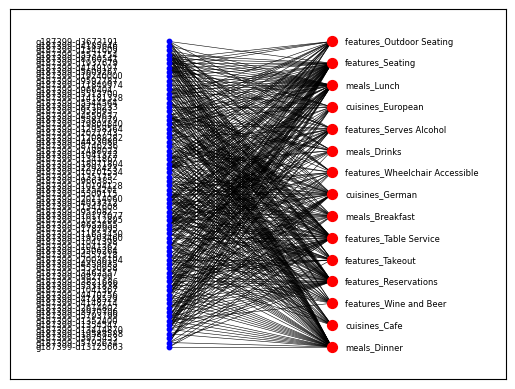

In [153]:
top = nx.bipartite.sets(G)[0]
dresden_pos = nx.bipartite_layout(G, top #, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333
                )

dresden_label_pos = {k: bipartite_shift(G, k, v) for k, v in dresden_pos.items()}
# dresden_labels = nx.draw_networkx_labels(
# #     G, pos=nx.spring_layout(G)
#     G, pos=dresden_label_pos, # labels=dresden_label_pos, 
# #     alpha=None, bbox=None, 
#     horizontalalignment='left', # verticalalignment='center', ax=None, clip_on=True
# )

color_dict = {}
color_map = {'restaurant': 0, 'feature': 1}
for n in G.nodes(data=True):
    color_dict[n[0]] = color_map[n[1]['bipartite']]
nodelist, dresden_node_color = zip(*color_dict.items())


# nx.draw_networkx(G, 
#                  pos=dresden_pos,
#                  node_color=dresden_node_color, 
# #                  labels=dresden_labels,
#                  with_labels=False,
                 
#                  width=0.5, # Line width of edges
# #                  font_size=8,
#                  node_size=50
#                 )
nx.draw_networkx_edges(G, 
                 pos=dresden_pos,
#                  edge_color='green',
                 width=0.4
)
# nodes of restaurants
nx.draw_networkx_nodes(G, 
                 nodelist = [n[0] for n in G.nodes(data=True) if n[1]['bipartite'] == 'restaurant' ],
                 pos=dresden_pos,
#                  node_color=dresden_node_color,
                 node_color='blue',
                 node_size=10
)
# nodes of features
nx.draw_networkx_nodes(G, 
                 nodelist=[n[0] for n in G.nodes(data=True) if n[1]['bipartite'] == 'feature' ],
                 pos=dresden_pos,
#                  node_color=dresden_node_color,
                 node_color='red',
                 node_size=50
)
# labels for nodes
nx.draw_networkx_labels(
    G, pos=dresden_label_pos, # labels=dresden_label_pos, 
    font_size=6,
#     alpha=None, bbox=None, 
    horizontalalignment='left', # verticalalignment='center', ax=None, clip_on=True
)

plt.xlim(-1.4, 2.3)
plt.show()

In [70]:
Dict = {"Alice": 0, "Bob": 1, "Carol": 2}
# G = nx.Graph()
# G.add_nodes_from(Dict.keys())
nodelist, node_color = zip(*Dict.items())
node_color

(0, 1, 2)